In [5]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [6]:
matplotlib.rcParams['figure.figsize'] = [6, 6]

# <font color='#eb3483'> Principal Component Analysis (PCA) </font>

In this notebook we have shown how calculate the PCA for a dataset "manually" if you are interested in the math behind it.   
**But the practical shortcut method with scikit-learn (that you would actually use in real life) is below that. So feel free to skip ahead straight to sci-kit learn.**

### <font color='#eb3483'> Loading the data </font>

We are going to use the Iris dataset (the first 3 features), and we will apply PCA "by hand" to reduce its dimensionality to 2 features.

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

We will select the first 3 features

In [8]:
target = iris.target
iris = iris.data[:,:3]

In [9]:
iris[:10]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5]])

In [10]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### <font color='#eb3483'> Visualising the data </font>

This is a visualisation of the three selected variables.   

The code gives a 3d visualisation with a widget built into your notebook that allows you to rotate the view of the data.

Dont worry about the code too much but if you ever need it there it is :)

It's also nice to see the possibilities of things you can include in your Jupyter notebooks. Like widgets!


We are going to plot a 3d chart for the first 3 variables. To do so we need the `%matplotlib notebook` display method.

In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


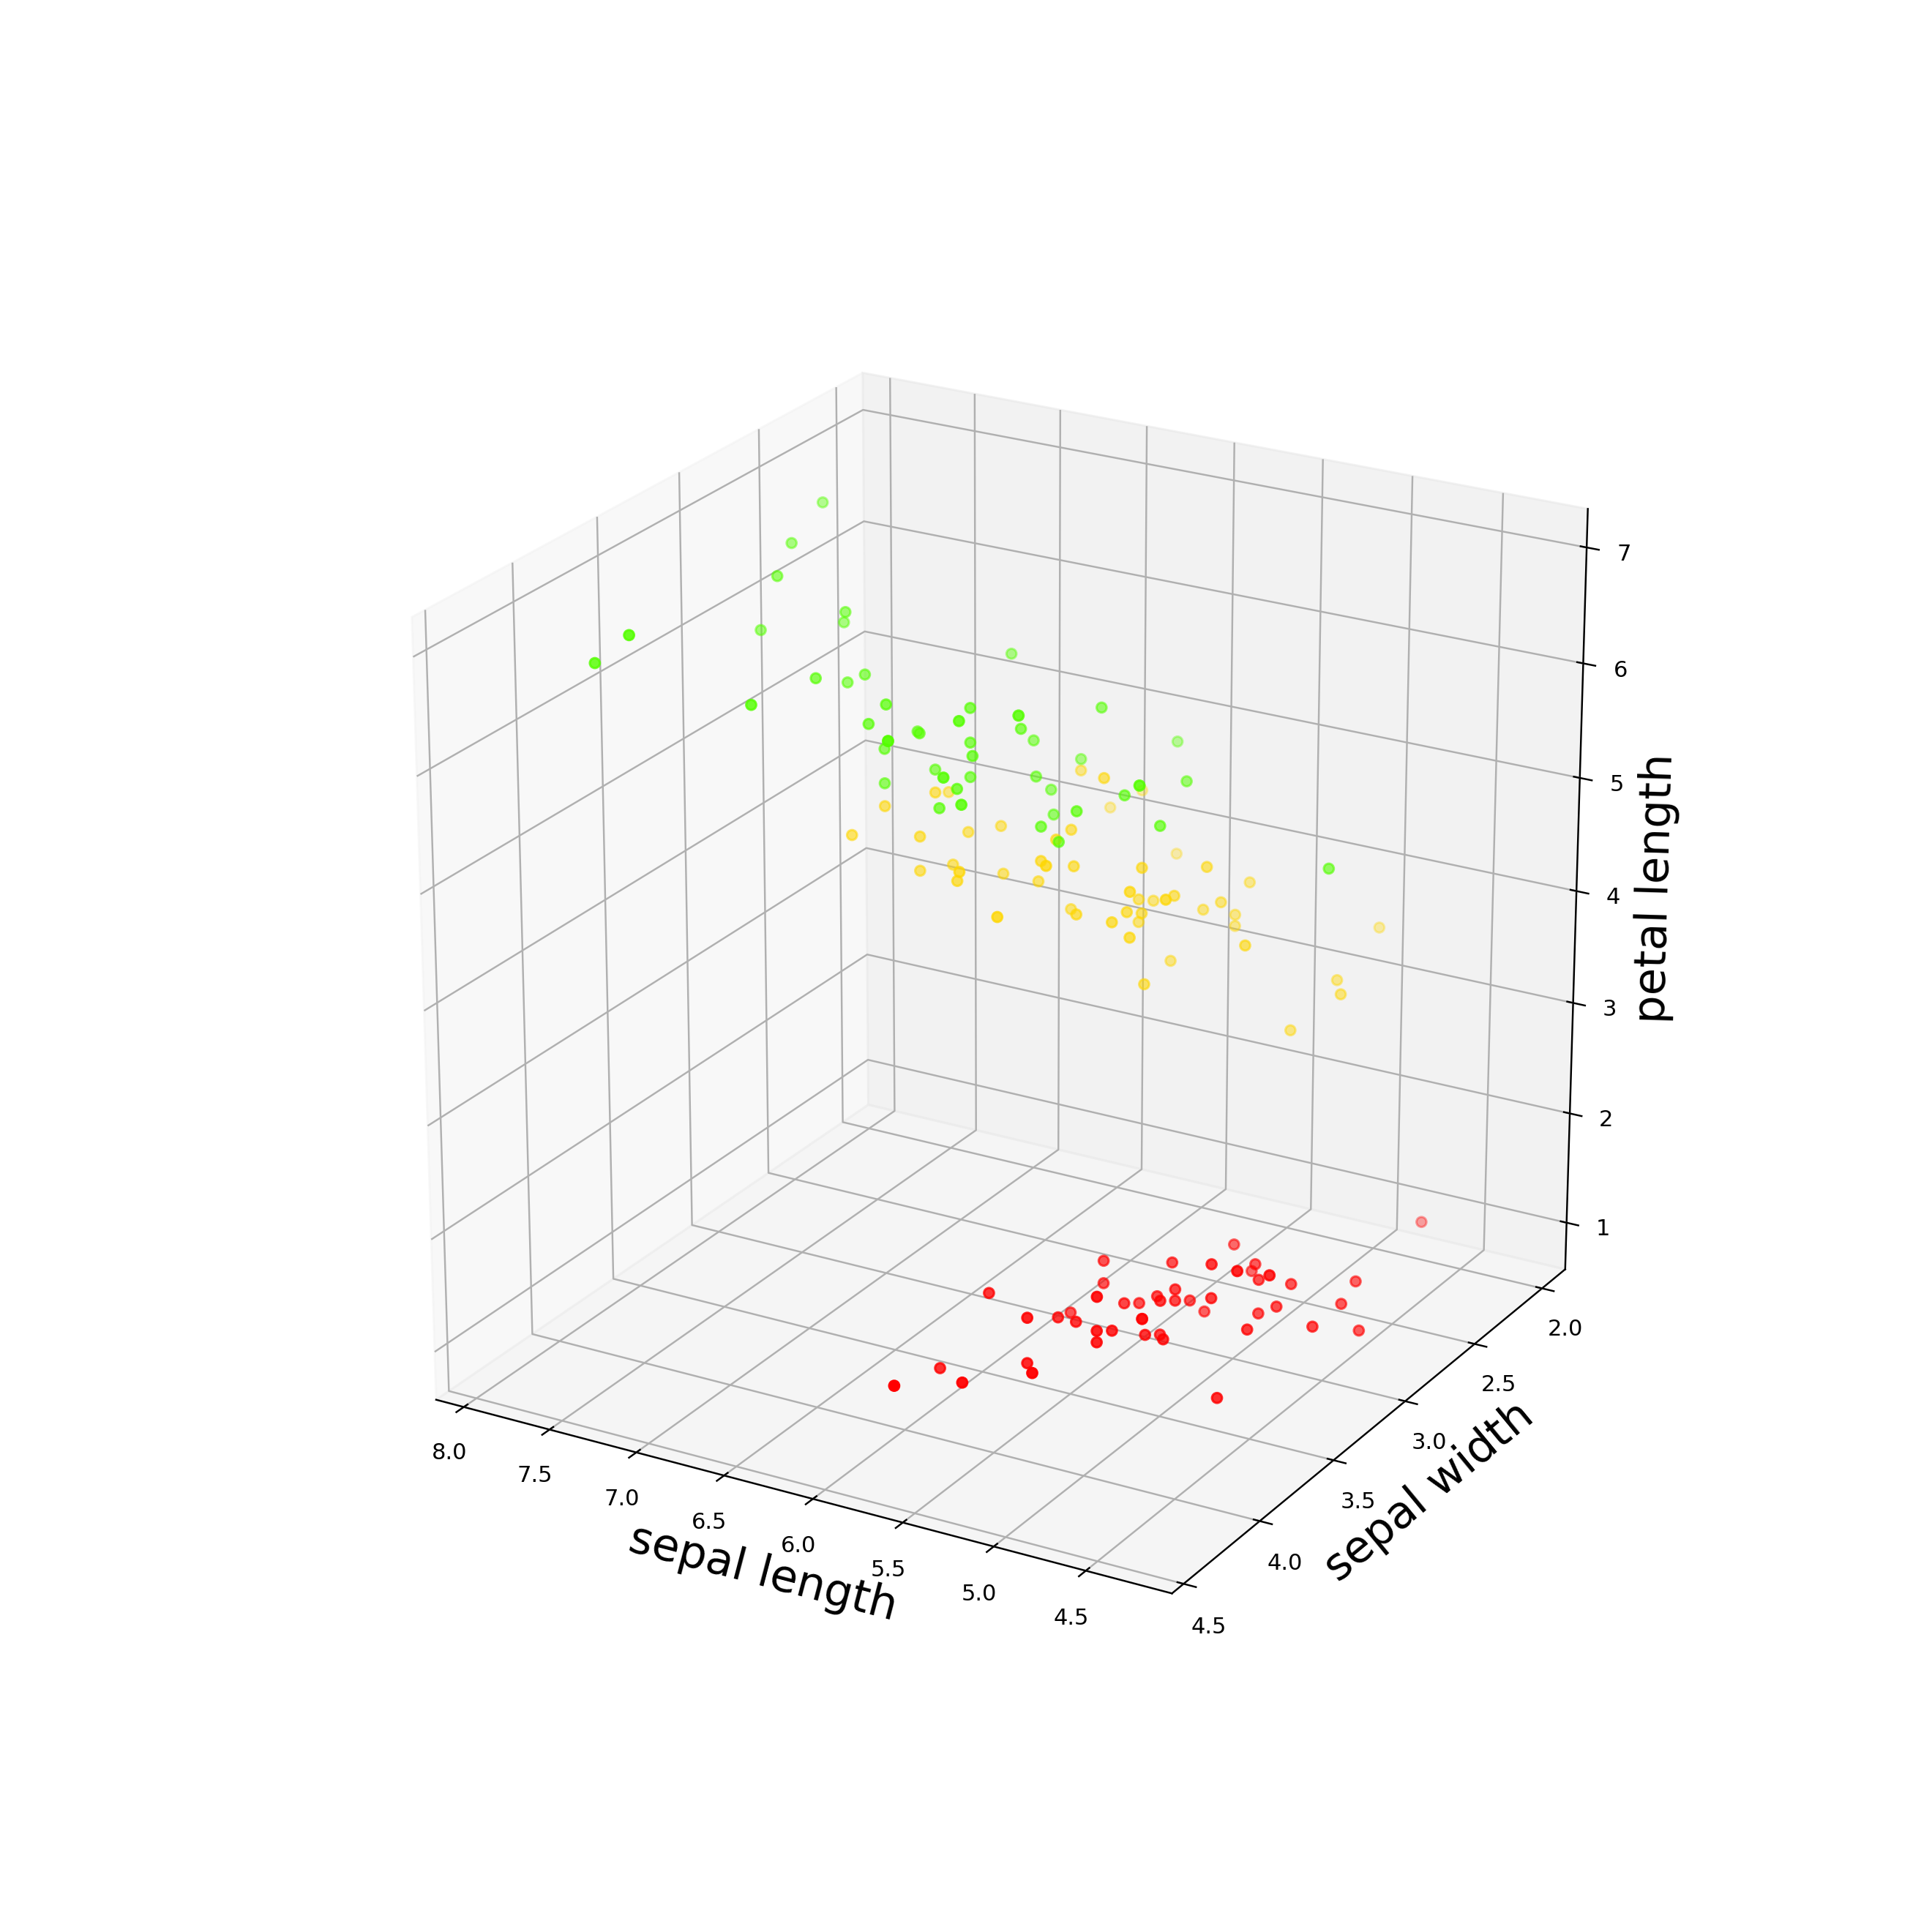

IntSlider(value=20, max=90)

In [12]:
from mpl_toolkits.mplot3d import Axes3D #we need to import this to use 3d projection
import ipywidgets as widgets
from IPython.display import display


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("sepal length", size=20)
ax.set_ylabel("sepal width", size=20)
ax.set_zlabel("petal length", size=20)
ax.scatter(iris[:,0], iris[:,1], iris[:,2], c=target,
           cmap=cm.prism)
ax.view_init(20, 120)
plt.show()

def update_chart(angle1=20, angulo2=120):
    # We change the degree
    ax.view_init(angle1, angulo2)
    fig.canvas.draw_idle()

# widgets
angle1_slider = widgets.IntSlider(20, min = 0, max = 90)
display(angle1_slider)

def update_angle1(value):
    update_chart(angle1=value['new'])

angle1_slider.observe(update_angle1, names='value');

# <font color='#eb3483'> Implementing PCA from scratch </font>
### Check this out if you are interested in the math behind it!
### DEFINITELY NO NEED TO GO INTO THIS AND NO SHAME TO SKIP TO THE SCIKIT-LEARN OPTION (Just as i would). 
### Thats why we have things like Scikit learn - to do all of vvv this for us!


#### PCA Step 1. Mean center the data.

We will substract the mean of each feature to each one of the rows.

In [28]:
iris.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     ])

In [29]:
iris_centered = (iris - iris.mean(axis=0))

In [30]:
iris_centered[:5]

array([[-0.74333333,  0.44266667, -2.358     ],
       [-0.94333333, -0.05733333, -2.358     ],
       [-1.14333333,  0.14266667, -2.458     ],
       [-1.24333333,  0.04266667, -2.258     ],
       [-0.84333333,  0.54266667, -2.358     ]])

#### PCA step 2. Calculate the covariance matrix

We calculate the covariance matrix with `np.cov` on the mean centered data

In [31]:
cov_mat = np.cov(m=iris_centered.T)
cov_mat

array([[ 0.68569351, -0.042434  ,  1.27431544],
       [-0.042434  ,  0.18997942, -0.32965638],
       [ 1.27431544, -0.32965638,  3.11627785]])

#### PCA Step 3. Decompose the covariance matrix

Now we need a linear algebra method to get the [eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of the covariance matrix.

We can use `np.linalg.eig` for the matrix decomposition.

In [32]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

print('EigenVectors:\n', eigenvectors)
print('\nEigenValues:', eigenvalues)

EigenVectors:
 [[-0.38983343  0.66289026  0.63922328]
 [ 0.09100801 -0.66300933  0.74305866]
 [-0.91637735 -0.34784355 -0.19813487]]

EigenValues: [3.69111979 0.05945372 0.24137727]


The principal components are the columns of the eigenvectors matrix.

**NOTE:** numpy `linalg.eig` implementation doesnt return the eigen vectors sorted from bigger to smaller eigen value. In this example, we see the 2 biggest eigen value is actually on the third position.

So we have to sort the vectors by ourselves.

In [33]:
eigenvalues

array([3.69111979, 0.05945372, 0.24137727])

In [34]:
np.argsort(eigenvalues)[::-1]

array([0, 2, 1])

In [35]:
components_order = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[components_order]

sorted_eigenvectors = eigenvectors[:,components_order]

print('Sorted EigenVectors:\n', sorted_eigenvectors)
print('\nSorted EigenValues:', sorted_eigenvalues)

Sorted EigenVectors:
 [[-0.38983343  0.63922328  0.66289026]
 [ 0.09100801  0.74305866 -0.66300933]
 [-0.91637735 -0.19813487 -0.34784355]]

Sorted EigenValues: [3.69111979 0.24137727 0.05945372]


The 3 vectors are the coordinates of the 3 eigenvectors of the covariance matrix (the 3 principal components). The 3 eigenvalues are the variance explained by each one of the components. We see that for this dataset, the first component explains the biggest chunk of variance.

We are going to plot the 3 principal components on the 3d chart we did before. In order to plot an arrow in 3d, I just copied [this stackoverflow implementation](https://stackoverflow.com/a/22867877/1403840).

In [36]:
# feel free to ignore this cell

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

The origins of the components are the mean of each one of the variables.

In [37]:
mean_x = iris_centered[:,0].mean()
mean_y = iris_centered[:,1].mean()
mean_z = iris_centered[:,2].mean()

<IPython.core.display.Javascript object>


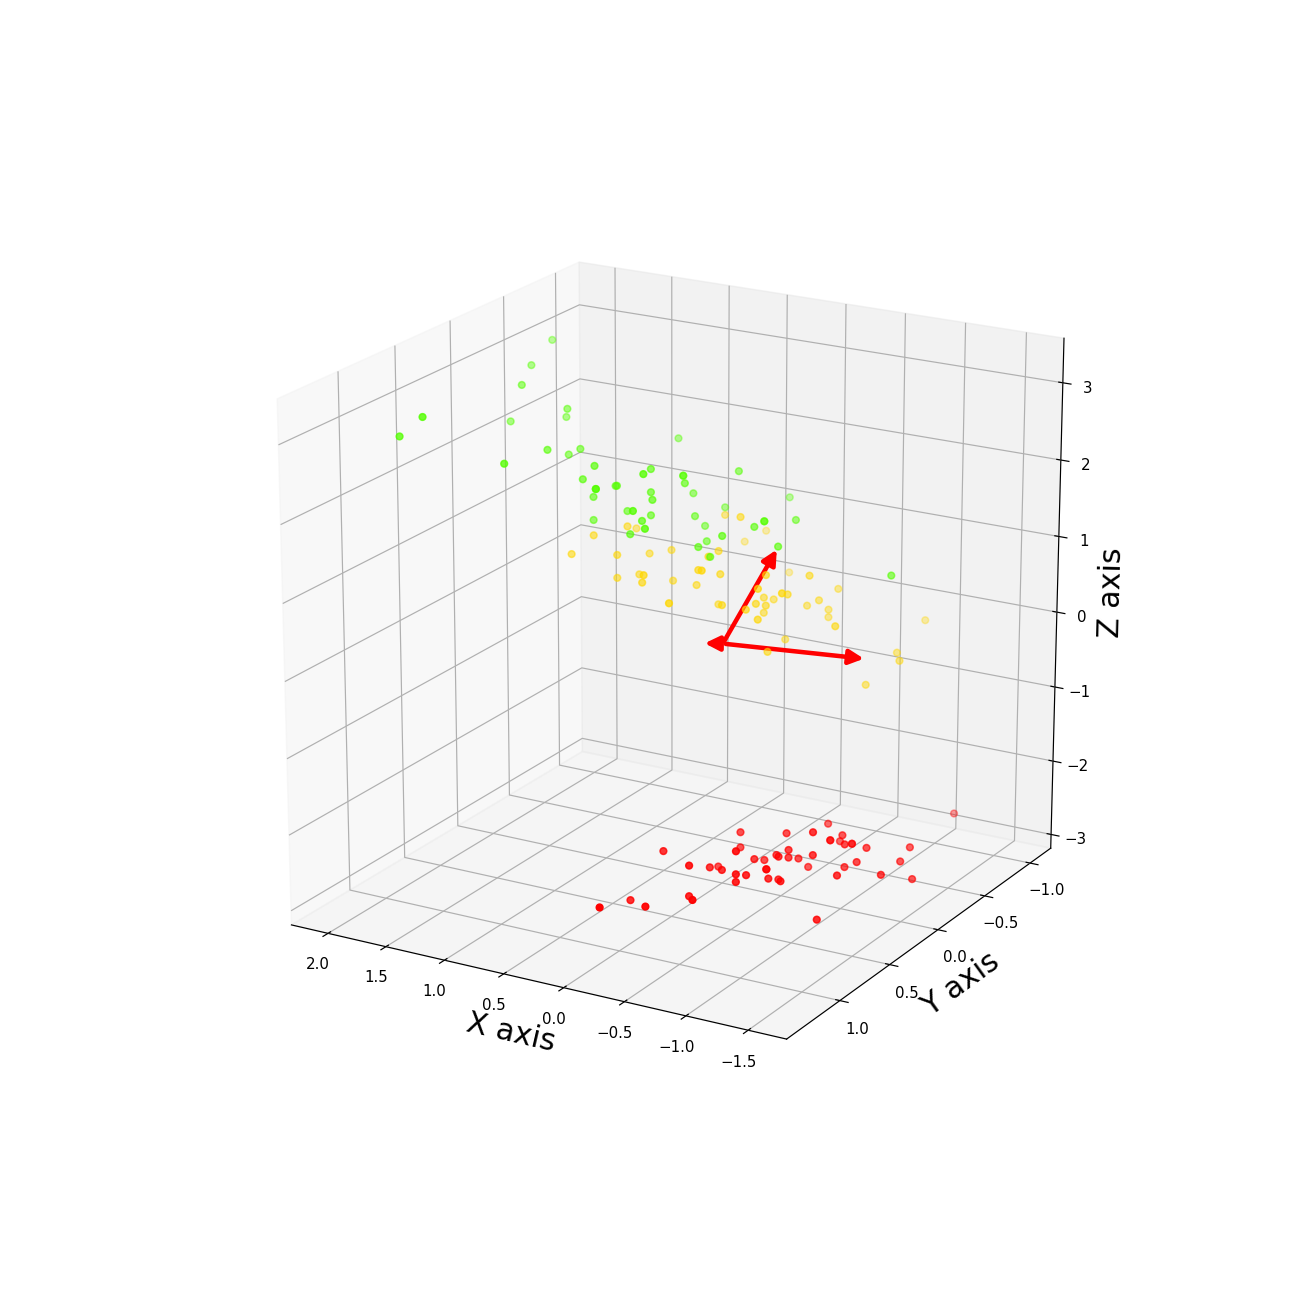

IntSlider(value=20, max=90)

In [38]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X axis", size=20)
ax.set_ylabel("Y axis", size=20)
ax.set_zlabel("Z axis", size=20)

ax.scatter(iris_centered[:,0], iris_centered[:,1], iris_centered[:,2], c=target,
           cmap=cm.prism)

for v in eigenvectors:
    
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], 
                [mean_z, v[2]], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.view_init(20, 120)
plt.show()

def update_chart(angle1=20, angulo2=120):
    ax.view_init(angle1, angulo2)
    fig.canvas.draw_idle()

# widgets
angle1_slider = widgets.IntSlider(20, min = 0, max = 90)
display(angle1_slider)

def update_angle1(value):
    update_chart(angle1=value['new'])

angle1_slider.observe(update_angle1, names = 'value')

How do we perform the transformation for new points?

Simple, we take the new points (on the old coordinate system) and multiply them by the N principal components that we want.

#### How many components should we keep?

Regarding the number of components, we can follow some common sense rules:
- Choose at least enough components that they explain 80% of the total variance.
- Choose those components with a variance explained above average.
- Plot a chart showing the eigenvalues and use the elbow method to select the number of components. (this is named **SCREE chart**).

In [39]:
%matplotlib inline

In [40]:
sorted_eigenvalues

array([3.69111979, 0.24137727, 0.05945372])

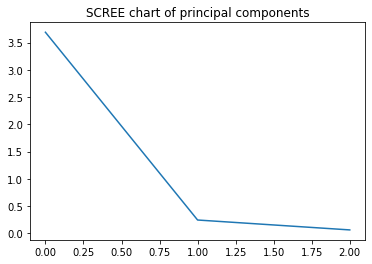

In [41]:
plt.plot(sorted_eigenvalues)
plt.title("SCREE chart of principal components");

We can find the % variance explained by each principal component by adding up the total variance and calculating the percentage of the total.

In [42]:
print("""
PCA 1: {0:.2f}% of variance explained
PCA 2:  {1:.2f}% of variance explained
PCA 3:  {2:.2f}% of variance explained
""".format(*tuple(sorted_eigenvalues / sorted_eigenvalues.sum() * 100)))


PCA 1: 92.46% of variance explained
PCA 2:  6.05% of variance explained
PCA 3:  1.49% of variance explained



So for this example we would choose either 1 or 2 components. 

If we want to keep 2 components, we can transform the original dataset (with 3 columns) into the new 2 dimensions by doing a matrix product.

In [43]:
iris_principal_components = iris_centered @ sorted_eigenvectors[:,:2]

In [44]:
iris_principal_components[:10]

array([[ 2.49088018,  0.32097336],
       [ 2.52334286, -0.17840062],
       [ 2.71114888, -0.13782006],
       [ 2.55775595, -0.31567523],
       [ 2.53896432,  0.3313569 ],
       [ 2.13542015,  0.75052335],
       [ 2.67669609, -0.07294414],
       [ 2.42912498,  0.16293168],
       [ 2.70915877, -0.57231813],
       [ 2.44080592, -0.12390824]])

Lets plot the components!

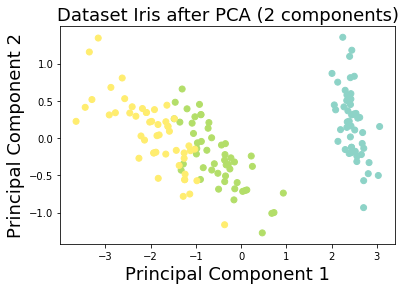

In [45]:
plt.scatter(iris_principal_components[:,0], iris_principal_components[:,1], c=target, 
            cmap=cm.Set3)
plt.title("Dataset Iris after PCA (2 components)", size=18)
plt.xlabel("Principal Component 1", size=18)
plt.ylabel("Principal Component 2", size=18);

<hr>

<br>
<br>
<br>
<br>
<br>
<br>

# <font color='#eb3483'> PCA in sklearn </font>

Of course, doing PCA in scikit learn is much easier.

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_centered)

We can see the components as well as their explained variance

In [47]:
pca.components_

array([[ 0.38983343, -0.09100801,  0.91637735],
       [ 0.63922328,  0.74305866, -0.19813487]])

In [48]:
pca.explained_variance_ratio_

array([0.92464061, 0.06046599])

We see that scikit-learn's implementation produces the same components as our manual method but with a different sign. The signs are irrelevant, it only matters the actual coordinates, and different numerical methods can yield different results.

In [49]:
eigenvectors[:,[0,2]].T

array([[-0.38983343,  0.09100801, -0.91637735],
       [ 0.63922328,  0.74305866, -0.19813487]])

In [50]:
iris_pca[:10]

array([[-2.49088018,  0.32097336],
       [-2.52334286, -0.17840062],
       [-2.71114888, -0.13782006],
       [-2.55775595, -0.31567523],
       [-2.53896432,  0.3313569 ],
       [-2.13542015,  0.75052335],
       [-2.67669609, -0.07294414],
       [-2.42912498,  0.16293168],
       [-2.70915877, -0.57231813],
       [-2.44080592, -0.12390824]])

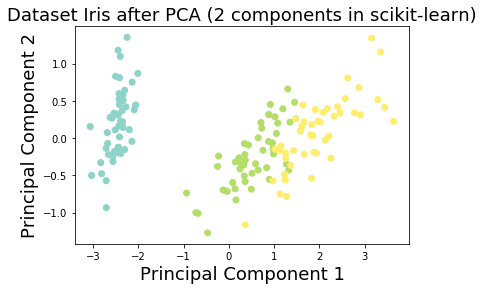

In [51]:
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=target, 
            cmap=cm.Set3)
plt.title("Dataset Iris after PCA (2 components in scikit-learn)", size=18)
plt.xlabel("Principal Component 1", size=18)
plt.ylabel("Principal Component 2", size=18);

### <font color='#eb3483'> Example: PCA for dimensionality reduction </font>

We've seen that with PCA we can separate classes in datasets that are easily separable.
Now we will see how we can use PCA to find insights.

To do so, we are going to use a new dataset, the [USDA nutrition research Dataset](https://www.ars.usda.gov/northeast-area/beltsville-md/beltsville-human-nutrition-research-center/nutrient-data-laboratory/docs/sr28-download-files/) that contains nutrition values for thousands of food ingredients.

In [54]:
food = pd.read_csv("data/nutrition_usda.csv")
food.head()

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct
0,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,...,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.00,14.2,0.0
1,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,...,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.80,9.4,0.0
2,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,...,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.80,205.0,0.0
3,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,...,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.35,17.0,0.0
4,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,...,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.00,113.0,0.0


In [55]:
food.shape

(8790, 50)

We see there are 50 nutritional values (vitamins, fats, salt, carbohydrates, ...) for 8000 different ingredients.

We are going to reduce the dimensionality using sklearn and visualize the structure of the data.

First we will store the food names into an array.


In [56]:
food_names = food.Shrt_Desc

In [57]:
food_names[:4]

0          BUTTER,WITH SALT
1    BUTTER,WHIPPED,W/ SALT
2      BUTTER OIL,ANHYDROUS
3               CHEESE,BLUE
Name: Shrt_Desc, dtype: object

In [58]:
from sklearn.preprocessing import StandardScaler

food_data = StandardScaler(with_std=False).fit_transform(
    food.drop("Shrt_Desc", axis=1).fillna(0)
)

Now we calculate the projection of the nutritional values on the first 2 main components.

In [59]:
estimator_pca = PCA(n_components=2)
food_pca = estimator_pca.fit_transform(food_data)

In [60]:
estimator_pca.explained_variance_ratio_.sum()

0.8249374760271067

In [61]:
food_pca[:5]

array([[1923.98919582, -536.4231448 ],
       [1891.97662363, -541.10037925],
       [2524.91593291, -621.14340844],
       [  57.98112111, -231.56621695],
       [ 432.27268259, -295.23814091]])

We are going to use Bokeh to make an interactive visualization.

In [62]:
food_pca_df = pd.DataFrame(food_pca, columns=["PC1", "PC2"])
food_pca_df["name"] = food_names
food_pca_df.sample(10)

,PC1,PC2,name
6950,-672.719421,-129.315971,"FAST FOODS,FRIED CHICK,BREAST,MEAT & SKN & BRE..."
5786,-707.272542,-132.351025,"MUFFINS,WHEAT BRAN,DRY MIX"
3886,-697.940743,-108.615685,"BEEF,LOIN,TENDERLOIN STEAK,BNLESS,LN,0"" FAT,CH..."
725,-707.832818,-137.432978,"FISH OIL,HERRING"
8605,-710.704997,-128.325507,"OIL,FLAXSEED,COLD PRESSED"
5471,-672.993222,-122.193573,"LAMB,NZ,IMP,SWEETBREAD,CKD,SOAKED & SIMMRD"
5849,-703.681814,-112.687103,"TORTILLAS,RTB OR -FRY,CORN"
6347,505.668107,-316.357627,"CANDIES,TOFFEE,PREPARED-FROM-RECIPE"
4544,-619.132589,-125.837116,"PIKE,NORTHERN,CKD,DRY HEAT"
575,-531.127497,-149.123288,"INF FORMULA,NESTLE,GOOD START ESSENTIALS SOY,W..."


We load bokeh

In [65]:
from bokeh.io import output_notebook

from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool

output_notebook()

Loading BokehJS ...

Now we do a visualization where we visualize the data in 2 dimensions.

In [66]:
source = ColumnDataSource(food_pca_df)

hover = HoverTool(tooltips=[
    ("(x,y)", "($x, $y)"),
    ("name", "@name"),
])

p = figure(plot_width=500, plot_height=500, 
           tools=[hover,"box_zoom", "pan", "zoom_out", "zoom_in"],
           title="2 Principal Components for nutritional values")

p.circle('PC1', 'PC2', size=10, source=source, fill_alpha=0.5)

show(p);

We see there are different "food lines" that are clearly differentiated from the rest.